# SVM

[支持向量机（SVM）原理](https://www.cnblogs.com/huangyc/p/9931233.html)

[SVM多分类问题](https://www.cnblogs.com/jpcflyer/p/11082443.html)


## 基本介绍
（1）支持向量机，英文全称“Support Vector Machines”（简称 SVM），它是机器学习中最常用的一种“分类算法”。在深度学习没有普及之前，“支持向量机”可以称的上是传统机器学习中的“霸主”。

（2）**建立一个最优决策超平面，使得该平面两侧距离该平面最近的两类样本之间的距离最大化**，从而对分类问题提供良好的泛化能力。对于一个多维的样本集，系统随机产生一个超平面并不断移动，对样本进行分类，直到训练样本中属于不同类别的样本点正好位于该超平面的两侧，满足该条件的超平面可能有很多个，SVM 正式在保证分类精度的同时，寻找到这样一个超平面，使得超平面两侧的空白区域最大化，从而实现对线性可分样本的最优分类。

<div align=center>
<img src="images/20240418152535.png" width="60%">
</div>

（3）支持向量机的三个重要部件为：最大间隔、高维映射、核函数。而**高维映射的核心就是“核函数”**，它在支持向量机中承担着两项任务，一是增加空间的维度，二是完成现有数据从原空间到高维空间的映射。

在 Pyhthon Sklearn 库提供了多种核函数，使用不同的核函数会对最终的分类效果带来不同程度影响，因此要选择使得分类效果最优的核函数。具体核函数如下：
- linear：选择线性函数；
  
- polynomial：选择多项式函数；

- rbf：选择径向基函数；

- sigmoid：选择 Logistics 函数作为核函数；
  
- precomputed：使用预设核值矩阵，
 
- SVC 类默认以径向基函数作为核函数。

In [202]:
#导入 sklearn 提供的鸢尾花数据
from sklearn.datasets import load_iris
#导入 导入skleran 提供的支持向量机算法
from sklearn.svm import SVC
#导入skleran 提供的分割数据集的方法
from sklearn.model_selection import train_test_split
#导入pandas
import pandas as pd
    
#加载数据集
iris = load_iris()

#分割数据集训练集，测试集
x_train,x_test,y_train,y_test=train_test_split(iris['data'],iris['target'],random_state=0)

#使用SVM.SVC分类算法搭建预测模型，并以径向基函数做为核函数的实现高维映射
model=SVC(kernel='rbf')

#训练模型
model.fit(x_train,y_train)

#训练后用测试集对模型进行评分
print("模型评分：",model.score(x_test,y_test))
print('-----------------------------------------------------')
    
# print('测试集前5条数据特征值: ')
# print(pd.DataFrame(x_test).head(5))
# print('-----------------------------------------------------')
# print('测试集前5条数据目标值: ')
# print(pd.DataFrame(y_test).head(5))
# print('-----------------------------------------------------')

#使用模型预测
# y_predict=model.predict(x_test)
# print('使用模型预测测试集前5条数据的目标值: ')
# print(pd.DataFrame(y_predict).head(5))

# 使用其他kernel再次训练模型
model_poly=SVC(kernel='linear') #  {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

#训练模型
model_poly.fit(x_train,y_train)

#训练后用测试集对模型进行评分
print("模型评分：",model_poly.score(x_test,y_test))
print('-----------------------------------------------------')

#使用模型预测
# y_predict=model_poly.predict(x_test)
# print('使用模型预测测试集前5条数据的目标值: ')
# print(pd.DataFrame(y_predict).head(5))

模型评分： 0.9736842105263158
-----------------------------------------------------
模型评分： 0.9736842105263158
-----------------------------------------------------


## 详细介绍

在介绍SVM之前需先熟悉[感知机](./perception.ipynb)章节的相关概念。

支持向量机（SVM, Support Vector Machines）是一种强大的监督学习模型，用于分类和回归任务，特别是在高维空间中表现出色。SVM的核心思想是找到一个最优的超平面（在二维空间中是一条直线），这个超平面能够最大化不同类别数据点之间的间隔，从而达到分类的目的。

### 基本原理

1. **最大间隔分类器**：
   - 在二分类问题中，SVM寻找一个超平面，这个超平面不仅能够正确地将数据分类，而且能够最大化最近的训练数据点（称为支持向量）到这个超平面的距离。这个最大的距离称为间隔，而最大化间隔的超平面被认为具有最好的泛化能力。

2. **支持向量**：
   - 支持向量是距离决策边界最近的那些数据点。它们是模型构建的关键，因为超平面的位置和方向完全由这些数据点确定。

3. **线性与非线性分类**：
   - 当数据线性可分时，SVM找到一个线性超平面作为决策界面。
   - 当数据非线性可分时，SVM通过一个映射函数将原始数据映射到一个更高维的空间，在这个空间中数据可能是线性可分的。这种映射通常通过一种称为核技巧的方法实现，避免了直接在高维空间中的复杂计算。

### 核技巧

核技巧是SVM处理非线性数据的一个重要特性。通过使用核函数，SVM可以在高维空间中进行计算，而无需显式地映射数据点到这个空间，从而节省了大量的计算资源。常用的核函数包括：

- **线性核**：没有进行任何映射，用于线性可分的数据。
- **多项式核**：能够表示数据点间的更复杂的关系。
- **径向基函数核（RBF）**：也称为高斯核，是一种常用的核，适用于多种类型的数据。
- **Sigmoid核**：模仿神经网络的激活函数。

### 软间隔与正则化

在现实世界的数据中，很少有完全线性可分的情况。为了增加SVM的鲁棒性，允许一些数据点违反最大间隔原则（即允许这些点位于错误的一侧），引入了软间隔概念。通过引入松弛变量（slack variables）和正则化参数（如 $C$），可以控制间隔的宽度和违规程度，平衡模型的复杂度和训练误差。


In [203]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        # 初始化学习率、正则化参数和迭代次数
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        # 初始化权重和偏置
        self.w = None
        self.b = None

    '''
        SVM训练过程
    '''
    def fit(self, X, y):
        # 获取样本数和特征数
        n_samples, n_features = X.shape
        # 将标签转换为 +1 或 -1
        y_ = np.where(y <= 0, -1, 1)
        
        # 初始化权重和偏置
        self.w = np.zeros(n_features)
        self.b = 0

        # 进行 n_iters 次迭代来更新权重和偏置
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # 计算条件 y_i * (w.x_i + b) >= 1 是否成立（也就是样本预测值和标签值是否一致）
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                # 如果条件成立，仅对权重进行正则化调整
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                # 如果条件不成立，更新权重和偏置
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
    '''
        SVM预测过程
    '''
    def predict(self, X):
        # 计算决策函数的值
        linear_output = np.dot(X, self.w) - self.b
        # 根据决策函数的符号进行分类
        return np.sign(linear_output)

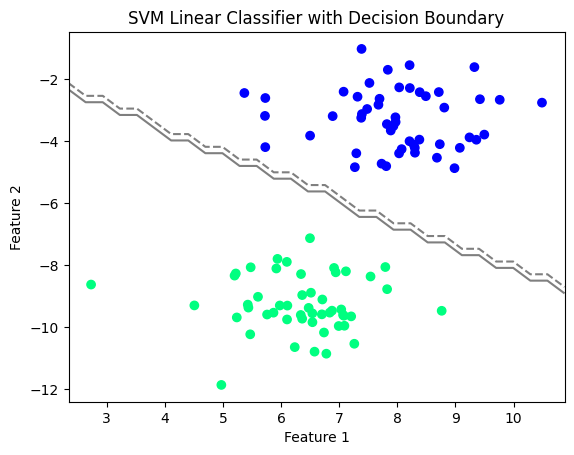

In [204]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# 生成一个线性可分的数据集
X, y = make_blobs(n_samples=100, centers=2, random_state=6) # centers是类别个数，由于SVM是一个二分类器，因此这里定义为2

# 将标签转换为 +1 和 -1
y[y == 0] = -1

# 创建 SVM 实例并训练
svm = SVM()
svm.fit(X, y)

# 预测
predictions = svm.predict(X)

# 可视化
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("SVM Linear Classifier")
# plt.show()

# 绘制决策边界
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 创建网格来评估模型
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.predict(xy).reshape(XX.shape)

# 绘制决策边界和边界
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Linear Classifier with Decision Boundary")
plt.show()

## 算法解析

### 正则化调整
在 SVM 的实现中，正则化是一种防止模型过拟合到训练数据的技术。它通过添加一个惩罚项到损失函数中，来限制模型权重的大小。在你提供的代码片段中，正则化调整的部分体现在权重更新的步骤。

#### 代码解释
这段代码：
```python
self.w -= self.lr * (2 * self.lambda_param * self.w)
```
是在执行权重的更新，其中包括了正则化的调整。这里的具体操作如下：

1. **`self.w`**: 当前的权重向量。
2. **`self.lr`**: 学习率（Learning Rate），控制权重调整的步长。
3. **`self.lambda_param`**: 正则化系数，它控制正则化项的强度。在 SVM 中，通常使用 L2 正则化。
4. **`2 * self.lambda_param * self.w`**: 这是 L2 正则化项的梯度。L2 正则化的目的是最小化权重向量的 L2 范数（即权重向量的平方和的平方根），其梯度就是 `2 * self.w`（因为权重向量的 L2 范数的导数是 `2 * w`），然后乘以正则化系数 `self.lambda_param`。

#### 正则化的作用
在机器学习中，L2 正则化有助于控制模型的复杂度，防止模型在训练数据上过拟合。通过惩罚较大的权重值，L2 正则化倾向于使权重向量的各个分量都较小，从而使模型的输出对输入中的噪声或不重要的变化不那么敏感。

#### 在 SVM 中的特别意义
在支持向量机（SVM）中，正则化尤为重要，因为它帮助确定最优的决策边界，这个边界不仅能正确分类大多数训练样本，而且具有最大的间隔。通过调整正则化系数（`lambda_param`），可以控制间隔的宽度和模型对错误分类的容忍度。较大的 `lambda_param` 会导致更小的间隔，而较小的 `lambda_param` 允许更大的间隔但可能增加训练错误。

这种权重的更新规则确保了模型在学习数据的同时也保持了一定的泛化能力，避免了过度依赖训练数据中的特定样本。


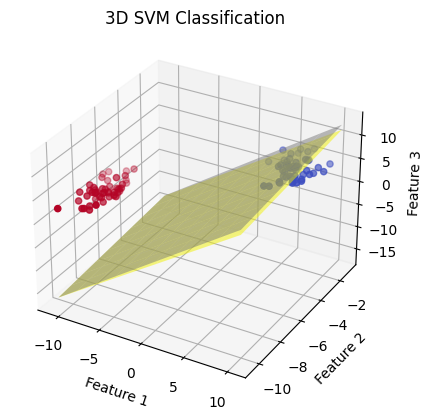

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 生成3D数据
X, y = make_blobs(n_samples=100, centers=2, n_features=3, random_state=6)

# 将标签转换为 +1 和 -1
y = 2 * (y - 0.5)

# 创建并训练一个线性SVM
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# 创建 SVM 实例并训练
svm = SVM(learning_rate=0.01, n_iters=1000)
svm.fit(X, y)

# 绘制数据点
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', marker='o')

## 使用sklearn的SVM库的结果可视化
# 获取分割超平面
w = clf.coef_[0]
a = -w[0] / w[2]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
yy = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
XX, YY = np.meshgrid(xx, yy)
zz = a * (XX * w[0] + YY * w[1]) + clf.intercept_[0]
ax.plot_surface(XX, YY, zz, color='yellow', alpha=0.5)

## 下面是自定义SVM的可视化
w = svm.w
a = -w[0] / w[2]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
yy = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
XX, YY = np.meshgrid(xx, yy)
zz = a * (XX * w[0] + YY * w[1]) + svm.b
ax.plot_surface(XX, YY, zz, color='grey', alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D SVM Classification')
plt.show()

## 非线性SVM

非线性支持向量机（Nonlinear Support Vector Machine, SVM）是一种用于分类和回归任务的强大机器学习模型，它特别适用于处理非线性可分数据。非线性SVM通过使用核技巧（Kernel Trick）来处理那些在原始空间中无法通过一个线性决策边界有效分隔的数据集。

### 核技巧（Kernel Trick）

非线性SVM的核心思想是将数据映射到一个更高维的空间，使得在这个新空间中，原本在原始空间中线性不可分的数据变得线性可分。这种映射是通过所谓的“核函数”来实现的，而不需要显式地计算映射后的数据点，从而避免了高维空间中的计算复杂性。

常见的核函数包括：
- **线性核（Linear Kernel）**: $K(x, x') = x \cdot x'$
- **多项式核（Polynomial Kernel）**: $K(x, x') = (γx \cdot x' + r)^d$，其中 $d$ 是多项式的度数。
- **径向基函数核（Radial Basis Function, RBF）**: $K(x, x') = \exp(-γ \|x - x'\|^2)$，其中 $γ$ 是一个参数，控制了函数的宽度。
- **Sigmoid核**: $K(x, x') = \tanh(γx \cdot x' + r)$

### 非线性SVM的训练

非线性SVM的训练过程类似于线性SVM，主要差异在于使用核函数替代了内积。训练过程涉及到优化一个目标函数，该函数旨在最大化间隔（margin）同时最小化分类错误。通过引入拉格朗日乘数（Lagrange Multipliers），问题转化为对偶问题，这使得只需通过核函数来表达数据点间的关系，而无需显式地在高维空间中计算它们。

### 非线性SVM的优缺点

**优点**：
- **强大的泛化能力**：当选择合适的核函数和参数后，非线性SVM通常能在各种数据集上表现出良好的分类性能。
- **有效处理高维数据**：即使在特征数大于样本数的情况下，SVM也能有效工作。
- **泛化错误率低**：SVM试图最大化决策边界的边距，因此泛化错误率通常很低。

**缺点**：
- **选择合适的核函数和参数**：核函数的选择和参数的调整（如 $C$、$γ$ 等）对SVM的性能有很大影响，需要通过交叉验证等方法仔细选择。
- **计算资源消耗大**：尤其是在大规模数据集上，训练SVM可能非常耗时。
- **解释性差**：SVM模型特别是使用了复杂核函数的模型，难以解释和理解。

非线性SVM是一种非常有效的工具，特别是在数据集本身具有复杂分布时。通过适当的核函数和参数调整，它可以在多种实际应用中提供高精度的预测。


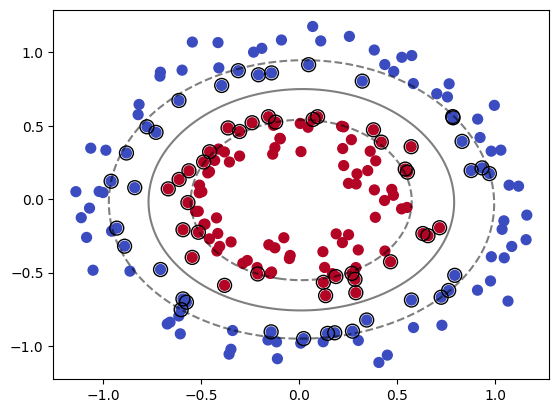

In [212]:
''' 
非线性SVM分类器, 基于sklearn实现
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles

# 生成线性不可分的数据
X_all, y_all = make_circles(n_samples=220, factor=0.5, noise=0.1, random_state=2024)
X, y = X_all[:200], y_all[:200]

# 使用带有 RBF 核的 SVM
svm_model = svm.SVC(kernel='rbf', C=1.0, gamma='auto') # gamma='auto', set gamma = 1 / n_features
svm_model.fit(X, y)

# 绘制数据点和决策边界
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)

# 创建网格来评估模型
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

# 计算决策函数
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界和支持向量
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

## 基于RBF的SVM预测过程

基于径向基函数（Radial Basis Function, RBF）的支持向量机（SVM）是一种常用的核方法，用于解决非线性分类问题。RBF核的SVM可以有效地处理在原始特征空间中不可分的数据，通过将数据映射到更高维的空间，在这个新空间中寻找最优的分割超平面。以下是基于RBF核的SVM的预测过程的详细描述：

### 1. 模型训练
在预测之前，首先需要训练SVM模型：
- **选择RBF核**：RBF核函数定义为 $K(x, x') = \exp(-\gamma \|x - x'\|^2)$，其中 $\gamma$ 是核函数的参数，控制了映射后空间的平滑程度。
- **训练数据**：使用训练数据集（输入向量和对应的标签），通过求解一个优化问题来找到支持向量和对应的系数（Lagrange乘子，即alphas）。这个优化问题旨在最大化间隔同时最小化误分类。
- **确定支持向量和偏置项**：在训练过程中，只有部分训练样本的alpha值会大于0，这些样本就是所谓的支持向量。偏置项b可以通过支持向量计算得出。

### 2. **预测新数据**
当模型训练完成后，可以使用它来预测新的数据点的类别：
- **计算核函数**：对于一个新的输入向量 $x$，计算它与每一个支持向量 $x_i$ 之间的RBF核函数值 $K(x, x_i)$。
- **决策函数**：使用训练过程中得到的alphas和支持向量，计算决策函数 $f(x) = \sum_{i=1}^{N} \alpha_i y_i K(x, x_i) + b$，其中 $N$ 是支持向量的数量，$y_i$ 是支持向量的标签。
- **输出预测**：根据决策函数的符号，即 $f(x)$ 的值是正还是负，来预测新数据点的类别。如果 $f(x) > 0$，则预测类别为+1；如果 $f(x) < 0$，则预测类别为-1。

### 3. 参数调整
- **调整 $\gamma$ 和惩罚参数 $C$**：这两个参数对模型的性能有很大影响。$\gamma$ 控制了核函数的宽度，$C$ 控制了误分类的惩罚程度。通常通过交叉验证等方法来选择最优的参数组合。

### 4. 性能评估
- **评估模型**：使用测试数据集来评估模型的性能，常用的评估指标包括准确率、召回率、F1分数等。

基于RBF核的SVM通过上述步骤实现了对新数据的有效预测，尤其适合处理那些在原始空间中线性不可分的复杂数据集。


支持向量个数: 67
预测的标签: [1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1]
模型准确率:  100.0
手写预测模块标签: [1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1]


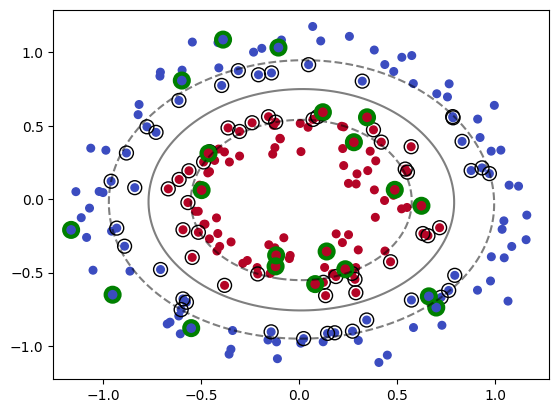

In [219]:
# # 打印刚刚的SVM模型参数和可视化其支持向量(Support Vectors)
print("支持向量个数:", len(svm_model.support_))
# print("支持向量的索引:", svm_model.support_)
# print("支持向量:", svm_model.support_vectors_)
# print("对偶系数:", svm_model.dual_coef_)
# print("截距:", svm_model.intercept_)

# 绘制数据点和决策边界
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)

# 创建网格来评估模型
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

# 计算决策函数
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界和支持向量
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

'''
对新数据分类的测试
'''
X_test, y_test = X_all[200:], y_all[200:]
# 使用模型进行预测
y_pred = svm_model.predict(X_test)

# 输出预测结果
print("预测的标签:", y_pred)

# 可选：评估模型性能
accuracy = svm_model.score(X_test, y_test)
print("模型准确率: ", accuracy*100.0)


# 手动实现SVM Predict
import numpy as np

def rbf_kernel(x1, x2, gamma):
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)

def predict_svm(X, support_vectors, dual_coef, intercept, gamma):
    predictions = []
    for x in X:
        decision_function = 0
        for coef, sv in zip(dual_coef[0], support_vectors):
            decision_function += coef * rbf_kernel(x, sv, gamma)
        decision_function += intercept
        predictions.append(np.sign(decision_function))
    return predictions


support_vectors = svm_model.support_vectors_
dual_coef = svm_model.dual_coef_
intercept = svm_model.intercept_[0]
gamma = 0.5 # is gamma='auto', set gamma = 1 / n_features

predictions = predict_svm(X_test, support_vectors, dual_coef, intercept, gamma)
predictions = np.asarray(predictions,dtype=int)
predictions = np.where(predictions <= 0, 0, 1)
print("手写预测模块标签:", np.asarray(predictions,dtype=int))

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', s=100)
ax.scatter(X_test[:, 0], X_test[:, 1], s=100, linewidth=3, facecolors='none', edgecolors='g')

## 工程部署

在实际工程实现中，存储所有的支持向量确实是必要的，因为它们是构建支持向量机（SVM）决策函数的核心组成部分。支持向量机的工作原理是基于找到数据集中的支持向量，并使用这些向量来定义决策边界。以下是存储支持向量的几个关键原因：

1. **决策函数计算**：
   支持向量是构建 SVM 决策函数的基础。决策函数通过计算新样本与支持向量之间的核函数，然后结合对偶系数和截距来确定新样本的类别。没有这些支持向量，你无法计算决策函数。

2. **模型精简**：
   尽管需要存储支持向量，但相对于整个训练数据集，支持向量通常只是一小部分。这实际上是一种数据压缩，因为你不需要整个训练集就能进行预测。这使得模型在存储和计算上更加高效。

3. **模型更新和微调**：
   如果需要对 SVM 模型进行更新或微调（例如在在线学习场景中），支持向量提供了一种有效的方式来更新决策边界而不必重新训练整个模型。

### 存储和优化

尽管存储支持向量是必要的，但在实际应用中，还可以采取一些策略来优化存储和计算效率：

- **选择合适的核函数**：选择合适的核函数可以减少支持向量的数量，从而减少存储需求和提高计算效率。
- **参数调整**：通过调整 SVM 的正则化参数（如 C）和核函数参数（如 RBF 核的 γ），可以影响支持向量的数量和模型的复杂度。
- **使用近似方法**：在一些应用中，可以使用近似方法来减少对精确支持向量的依赖，例如使用核近似技术或降低模型的精度要求。

### 结论

总的来说，支持向量是 SVM 模型的关键组成部分，必须被存储以便模型能够进行有效的预测。然而，通过合理的模型设计和参数选择，可以在保证性能的同时最小化存储和计算成本。
